In [1]:
from sysbiojax import Model

### Defining a simple Michaelis-Menten model

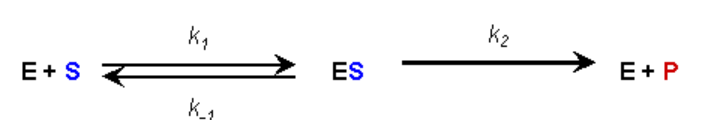

In [2]:
# Initialize the model
model = Model(name="Simple menten model")

# Add species
model.add_species("s1, s2")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")
model.add_ode("s2", "(v_max * s1) / ( K_m + s1)")

# Add parameter values
model.parameters.v_max.value = 5.0
model.parameters.K_m.value = 100.0

In [3]:
model

# Species


Eq(x, Matrix([[s1, s2]]))

# Parameters


Eq(theta, Matrix([[v_max, K_m]]))

# Equations


Eq(Derivative(s1, t), -s1*v_max/(K_m + s1))

Eq(Derivative(s2, t), s1*v_max/(K_m + s1))

In [4]:
model.parameters

,Name,Value
0,v_max,5.0
1,K_m,100.0


In [7]:
intial_conditions = {"s1": 50.0, "s2": 0.0}

time, states = model.simulate(
    initial_conditions=intial_conditions,
    t0=0, t1=100, dt0=0.1, nsteps=10
)

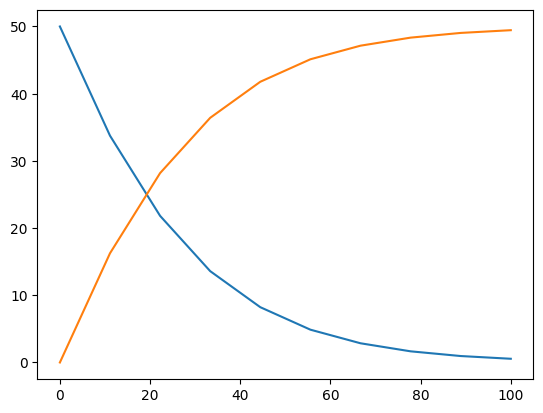

In [8]:
import matplotlib.pyplot as plt

plt.plot(time, states)

## Next steps

* ✅ Integrate `diffrax` generalized inetgration interface to simulate a given equation
  * See the following [colab notebook](https://colab.research.google.com/drive/1TRAaZe0YV7WQR127s05GcFijXJ6wPZm4?usp=sharing) for a first implementation
* Add NumPyro support for Bayes analysis
* Add symbolic identifiability analysis (Daisy)
  * Input-Output relation by using polynomials
  * Gröbner basis for global-, local or non-identifiability
* Add Neural ODE support